In [1]:
# import
import pathlib
import zipfile
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# zipfile.ZipFile('log_final_out.zip').extractall('log_final_out/')

In [3]:
# sep='|'

## 1개 매핑결과 파일 불러오기

In [4]:
df_out = pd.read_csv('log_final_out/Log.final.out_1', engine='python', encoding='cp949', names=['reault'], on_bad_lines='skip')

In [5]:
# df.to_csv('Log.final.out_1.csv', index=False)

In [6]:
# for i in range(len(log_cnt)):
#     df = pd.read_csv('log_final_out/'+log_cnt[i], engine='python', encoding='cp949', names=['reault'], on_bad_lines='skip')
#     df.to_csv('log_final_csv/'+log_cnt[i]+'.csv', index=False)

In [7]:
df = pd.read_csv('log_final_csv/Log.final.out_1.csv')
display(df.loc[[7]])
display(df.loc[[21]])

,reault
7,Uniquely mapped reads ...


,reault
21,% of reads mapped to multiple loc...


## 파일 이름 정렬하기

In [8]:
log_cnt_os = sorted(os.listdir('log_final_out'))
_log_cnt = pd.DataFrame(log_cnt_os, columns=['file_name'])

In [9]:
_log_cnt

,file_name
0,Log.final.out_1
1,Log.final.out_100
2,Log.final.out_101
3,Log.final.out_102
4,Log.final.out_103
...,...
96,Log.final.out_95
97,Log.final.out_96
98,Log.final.out_97
99,Log.final.out_98


In [10]:
log_split = _log_cnt['file_name'].str.split('_', expand=True)
log_split.columns = ['file', 'num']
log_split.head()

,file,num
0,Log.final.out,1
1,Log.final.out,100
2,Log.final.out,101
3,Log.final.out,102
4,Log.final.out,103


In [11]:
log_cnt_cc = pd.concat([_log_cnt, log_split['num']], axis=1)
log_cnt_cc

,file_name,num
0,Log.final.out_1,1
1,Log.final.out_100,100
2,Log.final.out_101,101
3,Log.final.out_102,102
4,Log.final.out_103,103
...,...,...
96,Log.final.out_95,95
97,Log.final.out_96,96
98,Log.final.out_97,97
99,Log.final.out_98,98


In [12]:
log_cnt_int = log_cnt_cc.astype({'num':'int'})
log_cnt_idx = log_cnt_int.set_index('num')
log_cnt_sort = log_cnt_idx.sort_index()
_log_cnt = log_cnt_sort.reset_index()
_log_cnt

,num,file_name
0,1,Log.final.out_1
1,2,Log.final.out_2
2,3,Log.final.out_3
3,4,Log.final.out_4
4,5,Log.final.out_5
...,...,...
96,103,Log.final.out_103
97,104,Log.final.out_104
98,105,Log.final.out_105
99,106,Log.final.out_106


In [13]:
_log_cnt['file_name'][0]

'Log.final.out_1'

## 모든 매핑 결과파일의  Uniquely mapped reads 퍼센트 체크

In [14]:
df = pd.read_csv('log_final_csv/'+_log_cnt['file_name'][1]+'.csv')

In [15]:
df.loc[7][0][-6:-1]

'77.75'

In [16]:
unique_map = []
multiple_map = []
for i in range(len(_log_cnt)):
    df = pd.read_csv('log_final_csv/'+_log_cnt['file_name'][i]+'.csv')
    unique_map.append(df.loc[7][0][-6:-1])
    multiple_map.append(df.loc[21][0][-6:-1])

In [17]:
unique_map

['68.94',
 '77.75',
 '83.83',
 '79.29',
 '74.55',
 '74.83',
 '75.40',
 '74.41',
 '16.21',
 '74.86',
 '80.00',
 '65.44',
 '81.72',
 '72.75',
 '73.52',
 '83.10',
 '73.66',
 '66.34',
 '67.67',
 '80.47',
 '76.15',
 '72.26',
 '68.89',
 '71.07',
 '80.11',
 '13.84',
 '83.66',
 '77.38',
 '60.94',
 '71.87',
 '63.13',
 '61.77',
 '49.44',
 '68.26',
 '62.47',
 '73.01',
 '78.10',
 '69.70',
 '11.64',
 '81.31',
 '69.75',
 '79.11',
 '80.37',
 '75.25',
 '78.09',
 '22.17',
 '69.41',
 '67.93',
 '68.26',
 '80.03',
 '64.75',
 '76.05',
 '78.47',
 '34.17',
 '83.81',
 '58.98',
 '72.21',
 '82.06',
 '71.72',
 '78.73',
 '23.63',
 '81.23',
 '69.31',
 '75.28',
 '79.46',
 '80.68',
 '44.90',
 '80.18',
 '32.68',
 '81.68',
 '76.64',
 '72.40',
 '78.76',
 '68.10',
 '77.75',
 '50.22',
 '80.24',
 '65.76',
 '16.72',
 '79.38',
 '59.84',
 '77.04',
 '66.07',
 '60.72',
 '74.62',
 '41.48',
 '58.84',
 '63.88',
 '77.15',
 '85.19',
 '69.07',
 '75.92',
 '70.40',
 '49.53',
 '54.30',
 '16.22',
 '74.13',
 '37.89',
 '64.51',
 '62.56',


In [18]:
multiple_map

['29.12',
 '20.46',
 '14.52',
 '19.04',
 '22.93',
 '22.88',
 '23.37',
 '21.52',
 '80.20',
 '22.72',
 '16.57',
 '32.68',
 '16.56',
 '25.45',
 '24.68',
 '14.55',
 '24.47',
 '32.42',
 '31.06',
 '18.27',
 '22.13',
 '26.10',
 '29.34',
 '27.91',
 '17.83',
 '83.61',
 '14.64',
 '21.36',
 '37.51',
 '25.82',
 '34.66',
 '36.10',
 '48.20',
 '29.06',
 '35.53',
 '24.55',
 '20.66',
 '28.12',
 '84.89',
 '16.63',
 '27.56',
 '17.47',
 '17.49',
 '22.75',
 '18.03',
 '76.11',
 '28.17',
 '30.65',
 '30.54',
 '17.88',
 '33.33',
 '22.20',
 '19.37',
 '63.77',
 '14.71',
 '39.94',
 '24.73',
 '16.92',
 '27.19',
 '19.94',
 '74.10',
 '16.44',
 '29.58',
 '23.49',
 '19.27',
 '18.27',
 '53.33',
 '18.04',
 '63.99',
 '16.70',
 '22.23',
 '25.96',
 '19.89',
 '30.79',
 '21.07',
 '48.71',
 '18.56',
 '32.68',
 '80.41',
 '18.07',
 '38.61',
 '21.32',
 '32.92',
 '36.11',
 '22.52',
 '54.61',
 '40.13',
 '33.11',
 '20.05',
 '10.97',
 '29.74',
 '21.95',
 '27.47',
 '48.86',
 '44.62',
 '81.06',
 '24.72',
 '59.85',
 '34.63',
 '36.54',


In [19]:
_log_cnt.loc[: , 'Uniquely mapped reads %'] = unique_map
_log_cnt.loc[: , '% of reads mapped to multiple loci'] = multiple_map
log_cnt = _log_cnt.astype({'Uniquely mapped reads %' : 'float', '% of reads mapped to multiple loci' : 'float'})
log_cnt

,num,file_name,Uniquely mapped reads %,% of reads mapped to multiple loci
0,1,Log.final.out_1,68.94,29.12
1,2,Log.final.out_2,77.75,20.46
2,3,Log.final.out_3,83.83,14.52
3,4,Log.final.out_4,79.29,19.04
4,5,Log.final.out_5,74.55,22.93
...,...,...,...,...
96,103,Log.final.out_103,74.13,24.72
97,104,Log.final.out_104,37.89,59.85
98,105,Log.final.out_105,64.51,34.63
99,106,Log.final.out_106,62.56,36.54


In [20]:
log_cnt['Uniquely + multiple mapped reads %'] = log_cnt['Uniquely mapped reads %'] + log_cnt['% of reads mapped to multiple loci']

In [21]:
log_cnt['num'] = log_cnt['num'].map('ID{}'.format)

In [22]:
log_cnt

,num,file_name,Uniquely mapped reads %,% of reads mapped to multiple loci,Uniquely + multiple mapped reads %
0,ID1,Log.final.out_1,68.94,29.12,98.06
1,ID2,Log.final.out_2,77.75,20.46,98.21
2,ID3,Log.final.out_3,83.83,14.52,98.35
3,ID4,Log.final.out_4,79.29,19.04,98.33
4,ID5,Log.final.out_5,74.55,22.93,97.48
...,...,...,...,...,...
96,ID103,Log.final.out_103,74.13,24.72,98.85
97,ID104,Log.final.out_104,37.89,59.85,97.74
98,ID105,Log.final.out_105,64.51,34.63,99.14
99,ID106,Log.final.out_106,62.56,36.54,99.10


In [23]:
_mapped_persentage = log_cnt.drop(columns=['file_name'])
mapped_persentage = _mapped_persentage.rename(columns={'num' : 'Sample ID'})
mapped_persentage

,Sample ID,Uniquely mapped reads %,% of reads mapped to multiple loci,Uniquely + multiple mapped reads %
0,ID1,68.94,29.12,98.06
1,ID2,77.75,20.46,98.21
2,ID3,83.83,14.52,98.35
3,ID4,79.29,19.04,98.33
4,ID5,74.55,22.93,97.48
...,...,...,...,...
96,ID103,74.13,24.72,98.85
97,ID104,37.89,59.85,97.74
98,ID105,64.51,34.63,99.14
99,ID106,62.56,36.54,99.10


In [24]:
mapped_persentage.to_csv('mapped_persentage.csv', index=False)

In [25]:
df_map = mapped_persentage.rename(columns={'Uniquely mapped reads %' : 'Uniquely mapped', '% of reads mapped to multiple loci' : 'Multiple loci mapped', 'Uniquely + multiple mapped reads %' : 'Total mapped'})

In [26]:
df_map

,Sample ID,Uniquely mapped,Multiple loci mapped,Total mapped
0,ID1,68.94,29.12,98.06
1,ID2,77.75,20.46,98.21
2,ID3,83.83,14.52,98.35
3,ID4,79.29,19.04,98.33
4,ID5,74.55,22.93,97.48
...,...,...,...,...
96,ID103,74.13,24.72,98.85
97,ID104,37.89,59.85,97.74
98,ID105,64.51,34.63,99.14
99,ID106,62.56,36.54,99.10


In [27]:
df_map.describe()

,Uniquely mapped,Multiple loci mapped,Total mapped
count,101.000000,101.000000,101.000000
mean,66.675545,31.370594,98.046139
std,17.438525,17.264521,0.775065
min,11.640000,10.970000,95.930000
25%,63.130000,19.940000,97.650000
50%,72.260000,25.820000,98.210000
75%,78.100000,34.660000,98.740000
max,85.190000,84.890000,99.140000


In [28]:
uniquely = pd.DataFrame(columns=['Mapped type', 'Percentage'])
multiple = pd.DataFrame(columns=['Mapped type', 'Percentage'])
total = pd.DataFrame(columns=['Mapped type', 'Percentage'])

In [29]:
df_map.columns[1]

'Uniquely mapped'

In [30]:
df_map['Uniquely mapped'][0]

68.94

In [31]:
uniquely

,Mapped type,Percentage


In [32]:
for i in range(len(df_map['Sample ID'])):
    uniquely.loc[i] = [df_map.columns[1], df_map['Uniquely mapped'][i]]
    multiple.loc[i] = [df_map.columns[2], df_map['Multiple loci mapped'][i]]
    total.loc[i] = [df_map.columns[3], df_map['Total mapped'][i]]

In [33]:
display(uniquely)
display(multiple)
display(total)

,Mapped type,Percentage
0,Uniquely mapped,68.94
1,Uniquely mapped,77.75
2,Uniquely mapped,83.83
3,Uniquely mapped,79.29
4,Uniquely mapped,74.55
...,...,...
96,Uniquely mapped,74.13
97,Uniquely mapped,37.89
98,Uniquely mapped,64.51
99,Uniquely mapped,62.56


,Mapped type,Percentage
0,Multiple loci mapped,29.12
1,Multiple loci mapped,20.46
2,Multiple loci mapped,14.52
3,Multiple loci mapped,19.04
4,Multiple loci mapped,22.93
...,...,...
96,Multiple loci mapped,24.72
97,Multiple loci mapped,59.85
98,Multiple loci mapped,34.63
99,Multiple loci mapped,36.54


,Mapped type,Percentage
0,Total mapped,98.06
1,Total mapped,98.21
2,Total mapped,98.35
3,Total mapped,98.33
4,Total mapped,97.48
...,...,...
96,Total mapped,98.85
97,Total mapped,97.74
98,Total mapped,99.14
99,Total mapped,99.10


In [34]:
plot = pd.concat([uniquely, multiple, total])
plot

,Mapped type,Percentage
0,Uniquely mapped,68.94
1,Uniquely mapped,77.75
2,Uniquely mapped,83.83
3,Uniquely mapped,79.29
4,Uniquely mapped,74.55
...,...,...
96,Total mapped,98.85
97,Total mapped,97.74
98,Total mapped,99.14
99,Total mapped,99.10


c:\Users\user\.conda\envs\ml\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


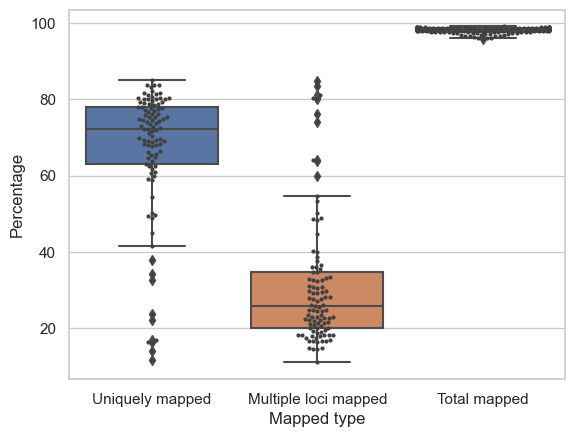

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')
sns.boxplot(data=plot, x='Mapped type', y='Percentage')
sns.swarmplot(data=plot, x='Mapped type', y='Percentage', color=".25", size=3)
plt.show()

In [36]:
# plot.to_csv('plot을위한파일.csv', index=False)

In [37]:
df_map

,Sample ID,Uniquely mapped,Multiple loci mapped,Total mapped
0,ID1,68.94,29.12,98.06
1,ID2,77.75,20.46,98.21
2,ID3,83.83,14.52,98.35
3,ID4,79.29,19.04,98.33
4,ID5,74.55,22.93,97.48
...,...,...,...,...
96,ID103,74.13,24.72,98.85
97,ID104,37.89,59.85,97.74
98,ID105,64.51,34.63,99.14
99,ID106,62.56,36.54,99.10


C:\Users\user\AppData\Local\Temp\ipykernel_19276\635447976.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=plot, x='Mapped type', y='Percentage', hue=plot.index,ci=False)


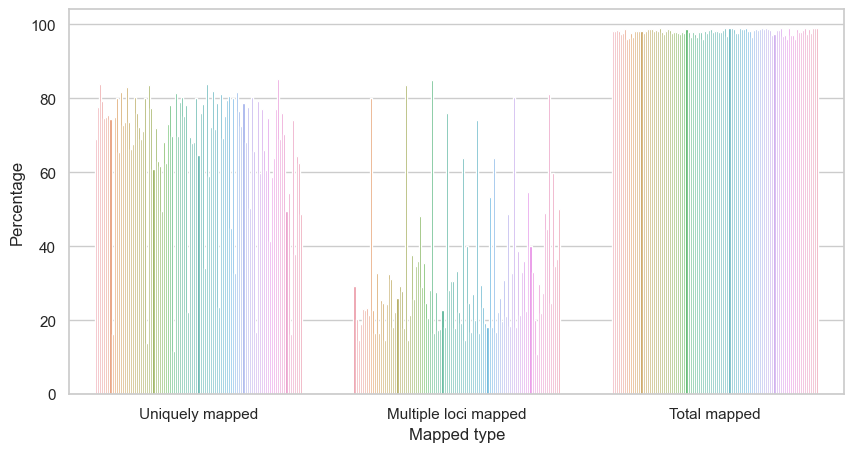

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))
sns.barplot(data=plot, x='Mapped type', y='Percentage', hue=plot.index,ci=False)
plt.legend([],[], frameon=False)
# plt.title('101 sample mapped percentage average', fontsize = 20)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19276\3306811980.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df_map, x='Sample ID', y='Uniquely mapped', ci=False, color='lightskyblue' )


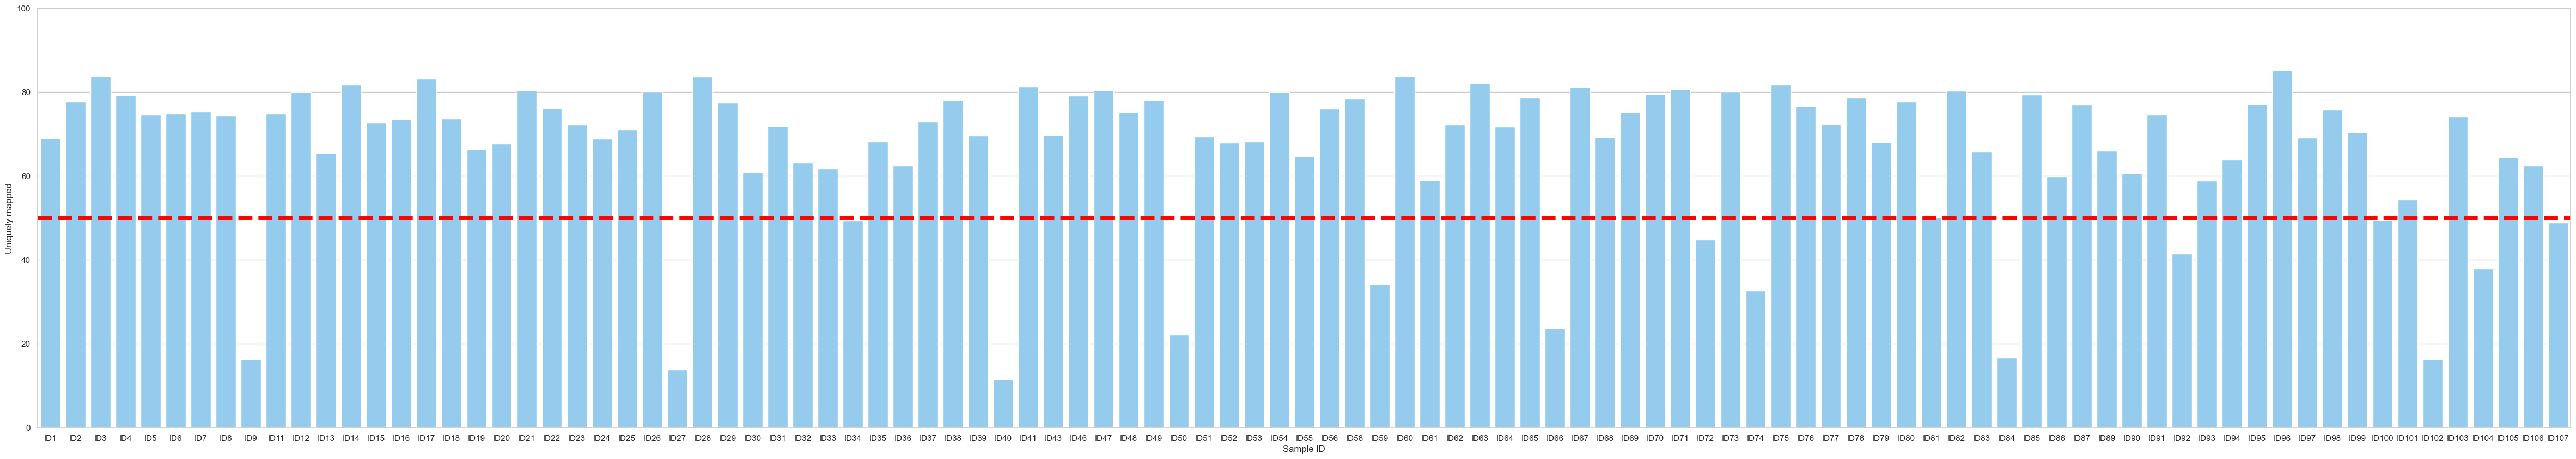

In [39]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (60,10))
sns.barplot(data=df_map, x='Sample ID', y='Uniquely mapped', ci=False, color='lightskyblue' )
plt.legend([],[], frameon=False)
plt.ylim(0,100)
plt.rc('ytick', labelsize=40)
plt.axhline(50, 0, 1, color='red', linestyle='--', linewidth=5)
# plt.title('101 sample mapped percentage average', fontsize = 20)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19276\46432895.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df_map, x='Sample ID', y='Multiple loci mapped', ci=False, color='lightpink')


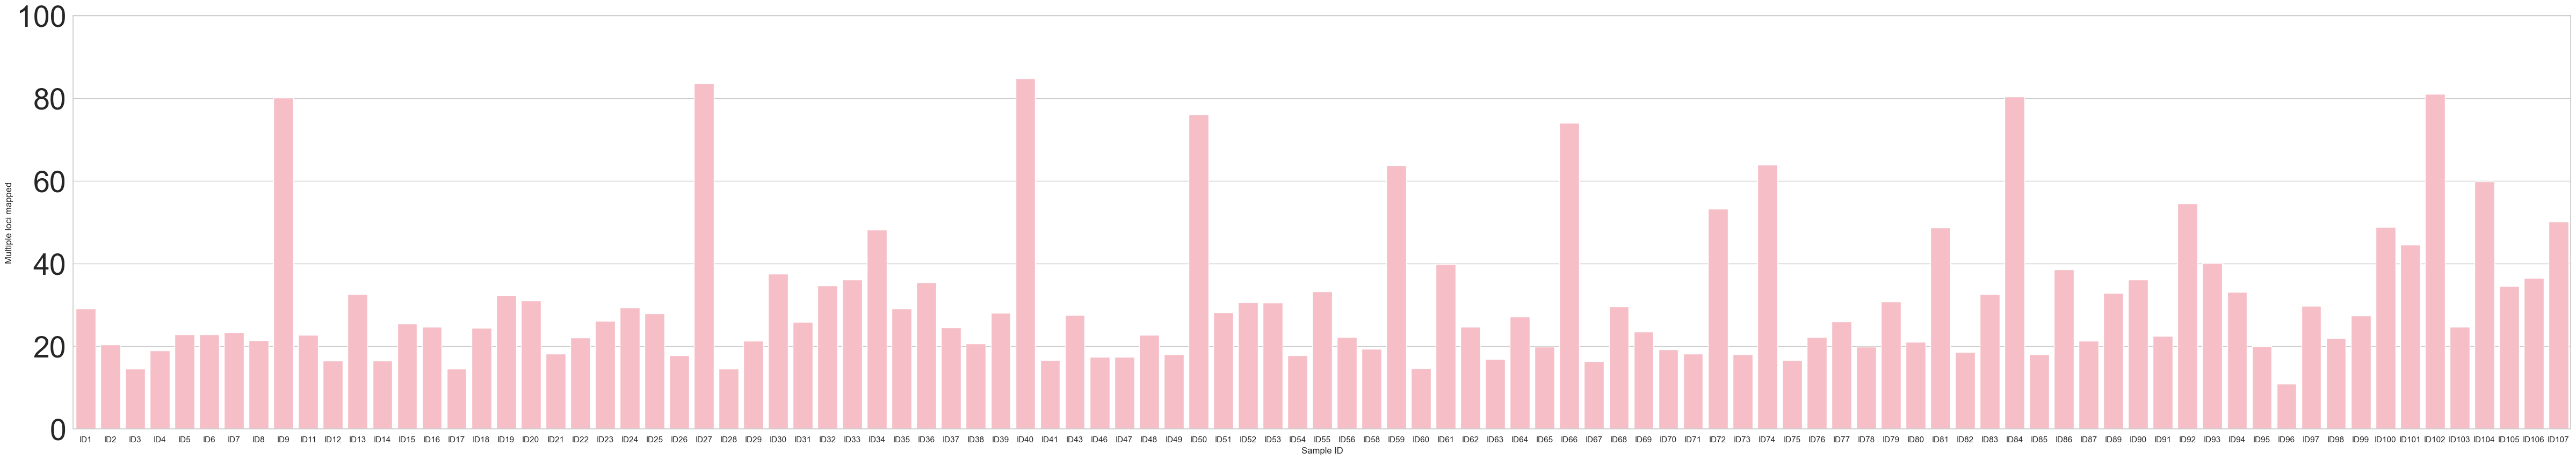

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (60,10))
sns.barplot(data=df_map, x='Sample ID', y='Multiple loci mapped', ci=False, color='lightpink')
plt.legend([],[], frameon=False)
plt.ylim(0, 100)
plt.rc('ytick', labelsize=40)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19276\4107520281.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df_map, x='Sample ID', y='Total mapped', ci=False, color='lightgreen')


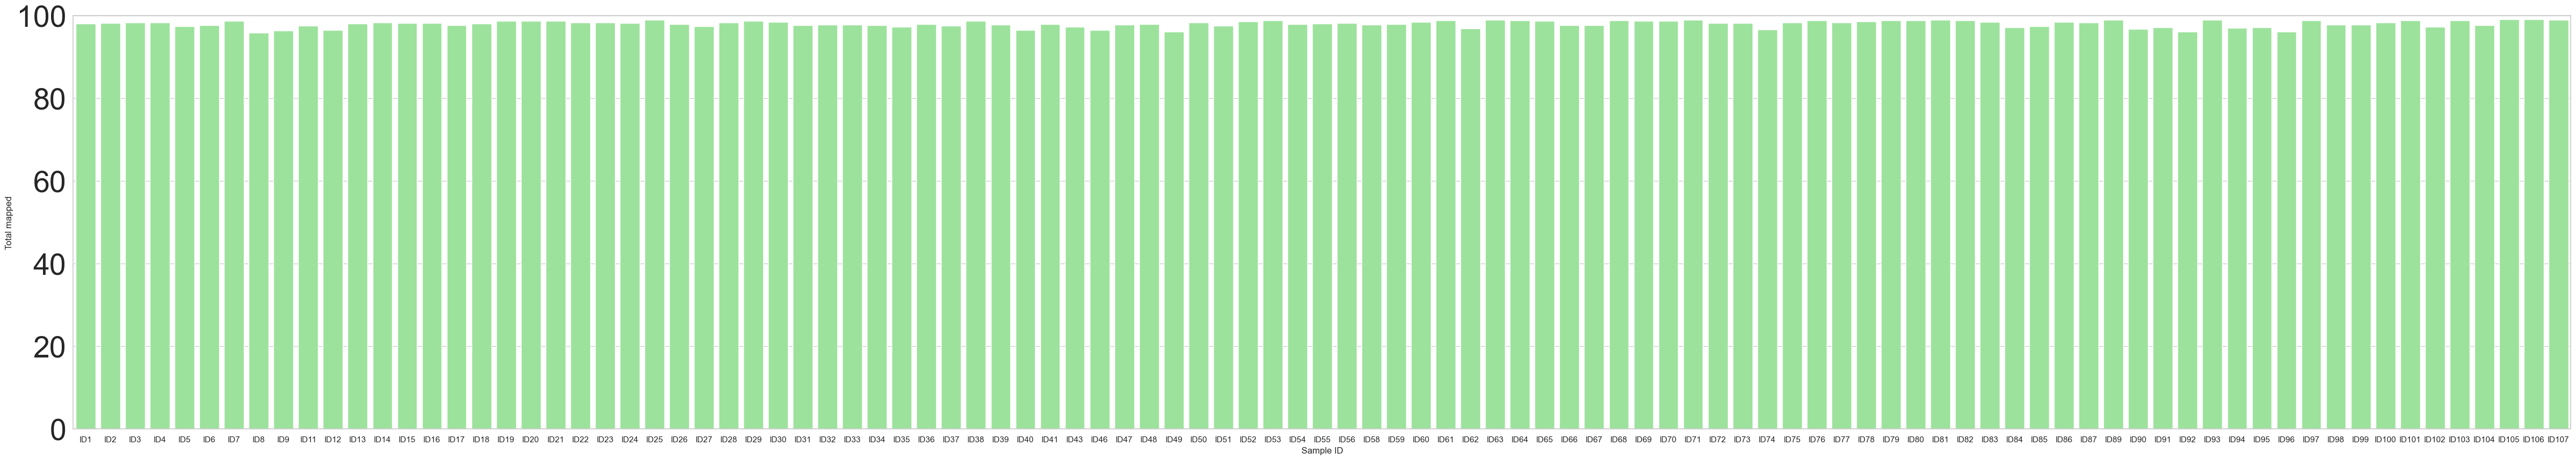

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (60,10))
sns.barplot(data=df_map, x='Sample ID', y='Total mapped', ci=False, color='lightgreen')
plt.legend([],[], frameon=False)
plt.ylim(0, 100)
plt.rc('ytick', labelsize=40)
plt.show()

In [43]:
_df_map_des = df_map.describe().T
_df_map_des

,count,mean,std,min,25%,50%,75%,max
Uniquely mapped,101.0,66.675545,17.438525,11.64,63.13,72.26,78.10,85.19
Multiple loci mapped,101.0,31.370594,17.264521,10.97,19.94,25.82,34.66,84.89
Total mapped,101.0,98.046139,0.775065,95.93,97.65,98.21,98.74,99.14


In [44]:
df_map_des = _df_map_des[['min', 'max', 'mean']]

In [45]:
df_map_des

,min,max,mean
Uniquely mapped,11.64,85.19,66.675545
Multiple loci mapped,10.97,84.89,31.370594
Total mapped,95.93,99.14,98.046139


In [46]:
list(df_map_des.columns)

['min', 'max', 'mean']

C:\Users\user\AppData\Local\Temp\ipykernel_19276\2153625757.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df_map_des, x=df_map_des.index, y=df_map_des['max'], ci=False)


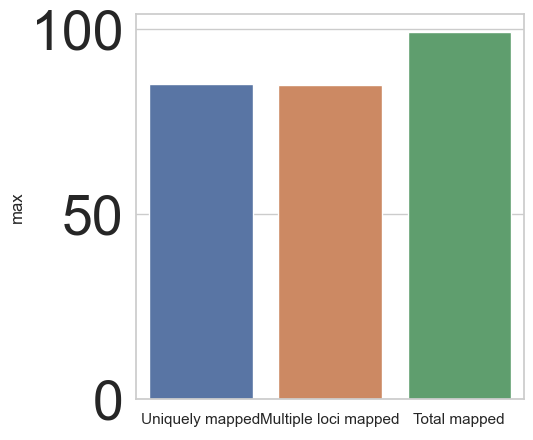

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (5,5))
sns.barplot(data=df_map_des, x=df_map_des.index, y=df_map_des['max'], ci=False)
# plt.title('101 sample mapped percentage average', fontsize = 20)
plt.show()

In [48]:
df_map[df_map['Uniquely mapped'] < 50]['Sample ID'].values

array(['ID9', 'ID27', 'ID34', 'ID40', 'ID50', 'ID59', 'ID66', 'ID72',
       'ID74', 'ID84', 'ID92', 'ID100', 'ID102', 'ID104', 'ID107'],
      dtype=object)

In [49]:
print(df_map[df_map['Uniquely mapped'] >= 80]['Sample ID'].values)
print(len(df_map[df_map['Uniquely mapped'] >= 80]['Sample ID'].values))

['ID3' 'ID12' 'ID14' 'ID17' 'ID21' 'ID26' 'ID28' 'ID41' 'ID47' 'ID54'
 'ID60' 'ID63' 'ID67' 'ID71' 'ID73' 'ID75' 'ID82' 'ID96']
18


In [55]:
df_map

,Sample ID,Uniquely mapped,Multiple loci mapped,Total mapped
0,ID1,68.94,29.12,98.06
1,ID2,77.75,20.46,98.21
2,ID3,83.83,14.52,98.35
3,ID4,79.29,19.04,98.33
4,ID5,74.55,22.93,97.48
...,...,...,...,...
96,ID103,74.13,24.72,98.85
97,ID104,37.89,59.85,97.74
98,ID105,64.51,34.63,99.14
99,ID106,62.56,36.54,99.10


<Axes: xlabel='Uniquely mapped', ylabel='Percent'>

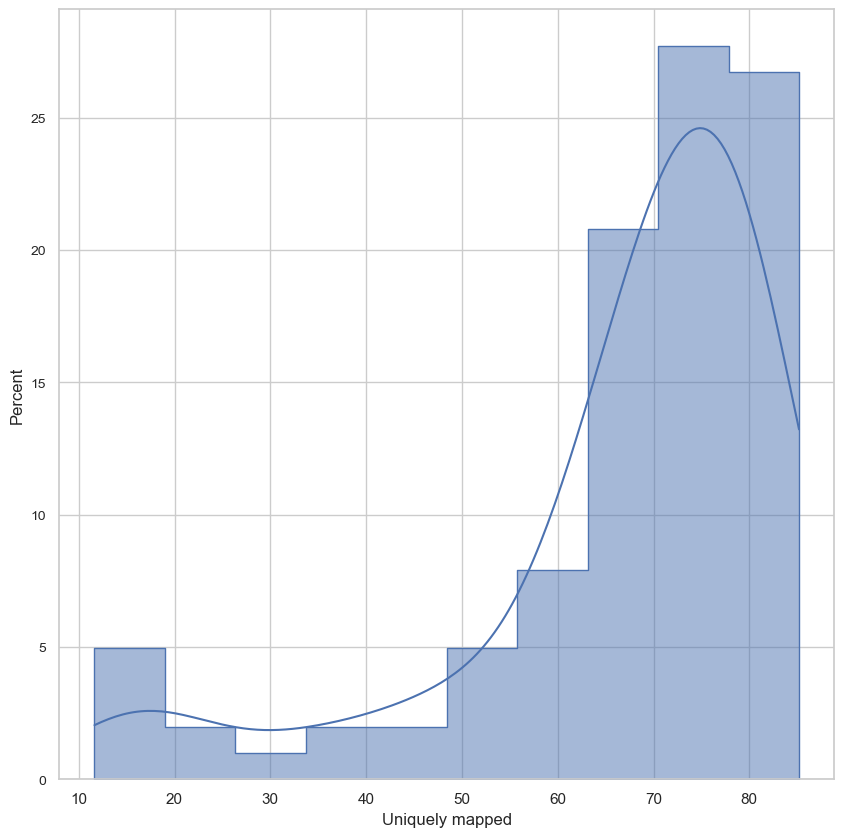

In [68]:
plt.figure(figsize = (10,10))
plt.rc('ytick', labelsize=10)
sns.histplot(data=df_map, 
            x='Uniquely mapped',
            bins=10, ## bin 개수
            kde=True, ## 밀도 함수 곡선 추가
            element='step', ## 히스토그램 표시형식,
            stat='percent', ## y값 계산 방식 count
            cumulative=False, ## True인 경우 누적 분포 형태로 그림)
)